              precision    recall  f1-score   support

           0       0.78      0.89      0.83        96
           1       0.76      0.59      0.66        58

    accuracy                           0.77       154
   macro avg       0.77      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154

0.6558441558441559


Text(0, 0.5, 'Mean Error')

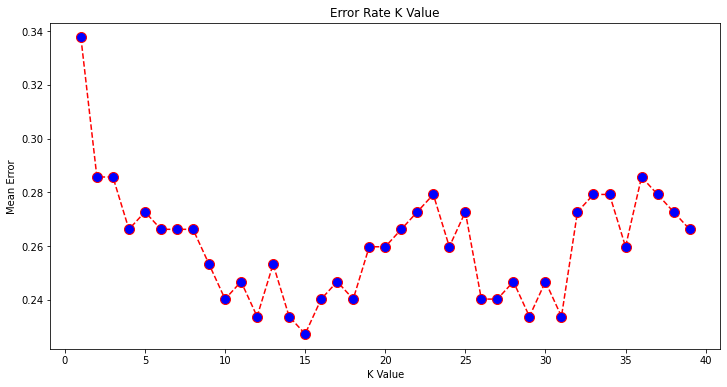

In [24]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

def weightedknn(df, p, k):
    distance = []

    for index, row in df.head(614).iterrows():
        euclidean_distance = math.sqrt(
            (row[1] - p[0]) ** 2 + (row[2] - p[1]) ** 2 + (row[3] - p[2]) ** 2 + (row[4] - p[3]) ** 2 + (
                        row[5] - p[4]) ** 2 + (row[6] - p[5]) ** 2 + (row[7] - p[6]) ** 2 + (row[8] - p[7]) ** 2)
        distance.append((euclidean_distance, row['Class']))
    distance = sorted(distance)[:k]
    freq1 = 0
    freq2 = 0
    for d in distance:
        if d[1] == 0:
            freq1 += (1 / d[0])

        elif d[1] == 1:
            freq2 += (1 / d[0])

    return 0 if freq1 > freq2 else 1


df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv', header=None)
df.columns = ['Times pregnant', 'Glucose concentration', 'Blood pressure', 'Skinfold thickness', 'serum insulin', 'BMI',
              'Pedigree', 'Age', 'Class']
X = df.iloc[:, :-1].values
y = df.iloc[:, 8].values
k = 15
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
classifier = KNeighborsClassifier(n_neighbors=k)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))
My_success = 0
Standart_success = 0
for index, row in df.tail(154).iterrows():
    if row[8] == weightedknn(df, (row['Times pregnant'], row['Glucose concentration'], row['Blood pressure'], row['Skinfold thickness'], row['serum insulin'], row['BMI'], row['Pedigree'], row['Age']), k):
        My_success += 1

print(My_success / 154)

error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
